In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
import torch.optim as optim
import torch.nn as nn
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

In [13]:
## load and transform data
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


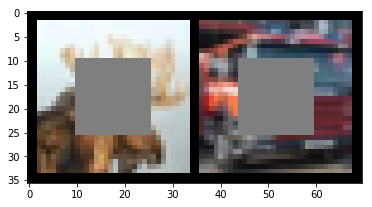

In [56]:
## this block is only for visualization of dataset, not necessary for training and evaluation

dataiter = iter(trainloader)
images, labels = dataiter.next()
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for i,image in enumerate(images):
    img = image
    for j, k in itertools.product(range(len(img[0])), range(len(img[0]))):
        if 8<=j<24 and 8<=k<24:
            img[0][j][k] = 0.5
            img[1][j][k] = 0.5
            img[2][j][k] = 0.5
    #images[i] = img
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join('%5s' % classes[labels[j]] for j in range(32)))